# Feature Selection
Nama : Ali Ahmad Fahrezy \
NIM  : 187221042

## Library

In [1]:
# Libraries
# For JupyterLite
%pip install seaborn openpyxl
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sklearn.model_selection as model_selection
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    classification_report,
)
from sklearn.tree import DecisionTreeClassifier, plot_tree

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.6 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


## Data

In [2]:
# Data
dataframe = pd.read_excel("BlaBla.xlsx")
data = dataframe[["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"]]

print("Data Awal".center(75, "="))
print(data)
print("=========================================================")

=================================Data Awal=================================
      A  B  C  D  E  F  G  H  I  J  K  L  M  N
0     1  0  1  0  0  0  0  0  1  0  0  0  1  0
1     5  0  0  0  0  0  0  0  1  1  1  0  1  1
2     3  0  0  0  0  0  1  0  0  0  0  0  1  0
3     5  0  0  0  0  0  0  0  0  1  0  0  1  0
4     3  0  0  0  0  0  1  0  0  0  1  0  1  0
...  .. .. .. .. .. .. .. .. .. .. .. .. .. ..
2303  2  0  0  1  0  0  0  1  0  1  1  1  1  1
2304  1  1  0  1  0  0  0  0  1  0  0  0  1  1
2305  1  0  0  1  0  0  0  0  0  1  1  1  1  1
2306  4  0  0  0  0  0  0  0  1  0  1  1  1  1
2307  1  0  0  0  0  0  0  1  0  0  1  0  1  1

[2308 rows x 14 columns]


## Random Forest
Membagi data menjadi dua bagian fitur data (data Variabel) dan data target (data kelas
atau sebagai hasil akhir keputusan)

In [3]:
# Grouping
print("Grouping Variabel".center(75, "="))
X = data.iloc[:, 0:13].values
y = data.iloc[:, 13].values
print("Data Variabel".center(75, "="))
print(X)
print("Data Kelas".center(75, "="))
print(y)

=============================Grouping Variabel=============================
===============================Data Variabel===============================
[[1 0 1 ... 0 0 1]
 [5 0 0 ... 1 0 1]
 [3 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 1 1 1]
 [4 0 0 ... 1 1 1]
 [1 0 0 ... 1 0 1]]
=================================Data Kelas================================
[0 1 0 ... 1 1 1]


Membagi data lagi menjadi 2 bagian yaitu data untuk training dan juga testing, dalam hal
ini menggunakan proporsi 80% data training dan 20% data testing. Lalu sampel diambil
secara acak.

In [4]:
# Training dan Testing
print("Splitting Data 20-80".center(75, "="))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Instance variabel data training".center(75, "="))
print(X_train)
print("Instance kelas data training".center(75, "="))
print(y_train)
print("Instance variabel data testing".center(75, "="))
print(X_test)
print("Instance data testing".center(75, "="))
print(y_test)
print()

============================Splitting Data 20-80===========================
======================Instance variabel data training======================
[[3 0 0 ... 1 0 1]
 [3 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 ...
 [1 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 [4 0 0 ... 1 0 1]]
========================Instance kelas data training=======================
[1 0 0 ... 0 0 0]
=======================Instance variabel data testing======================
[[5 0 0 ... 0 0 1]
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 ...
 [2 0 0 ... 1 1 1]
 [1 1 0 ... 0 0 1]
 [4 0 0 ... 0 0 1]]
===========================Instance data testing===========================
[0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0

Melatih dengan metode random forest menggunakan training data, setelah itu melakukan
tes model dengan data testing dan hasil testing ditampilkan pada console.

In [5]:
# Random Forest
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)

# Prediksi Random Forest
print("Instance prediksi random forest : ")
Y_pred = random_forest.predict(X_test)
print(Y_pred)
print("===================================================")
print()

Instance prediksi random forest : 
[0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]



Menghitung akurasi dan juga report dari hasil training dan testing tersebut.

In [6]:
# Prediksi Awal
accuracy = round(accuracy_score(y_test, Y_pred) * 100, 2)
print("Akurasi: ", accuracy, "%")

# Display Classification Report
print("Classfication Report Random Forest".center(75, "="))
print(classification_report(y_test, Y_pred))

# Display Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix: ")
print(cm)

Akurasi:  96.32 %
=====================Classfication Report Random Forest====================
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       315
           1       0.99      0.90      0.94       147

    accuracy                           0.96       462
   macro avg       0.97      0.95      0.96       462
weighted avg       0.96      0.96      0.96       462

Confusion Matrix: 
[[313   2]
 [ 15 132]]


Melakukan percobaan dengan input data.

=============================== INPUT CONTOH ==============================


Age:  20


Jenis Kelamin 0 = Perempuan, 1 = Laki-laki


Jenis Kelamin:  1


Y = Yes. N = No


Apakah pasien mengalami C? :  Y
Apakah pasien mengalami D? :  Y
Apakah pasien mengalami E? :  N
Apakah pasien mengalami F? :  N
Apakah pasien mengalami G? :  N
Apakah pasien mengalami H? :  Y
Apakah pasien mengalami I? :  Y
Apakah pasien mengalami J? :  Y
Apakah pasien mengalami K? :  Y
Apakah pasien mengalami L? :  N
Apakah M? :  N


Kode umur pasien:  1
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0]
Pasien positif


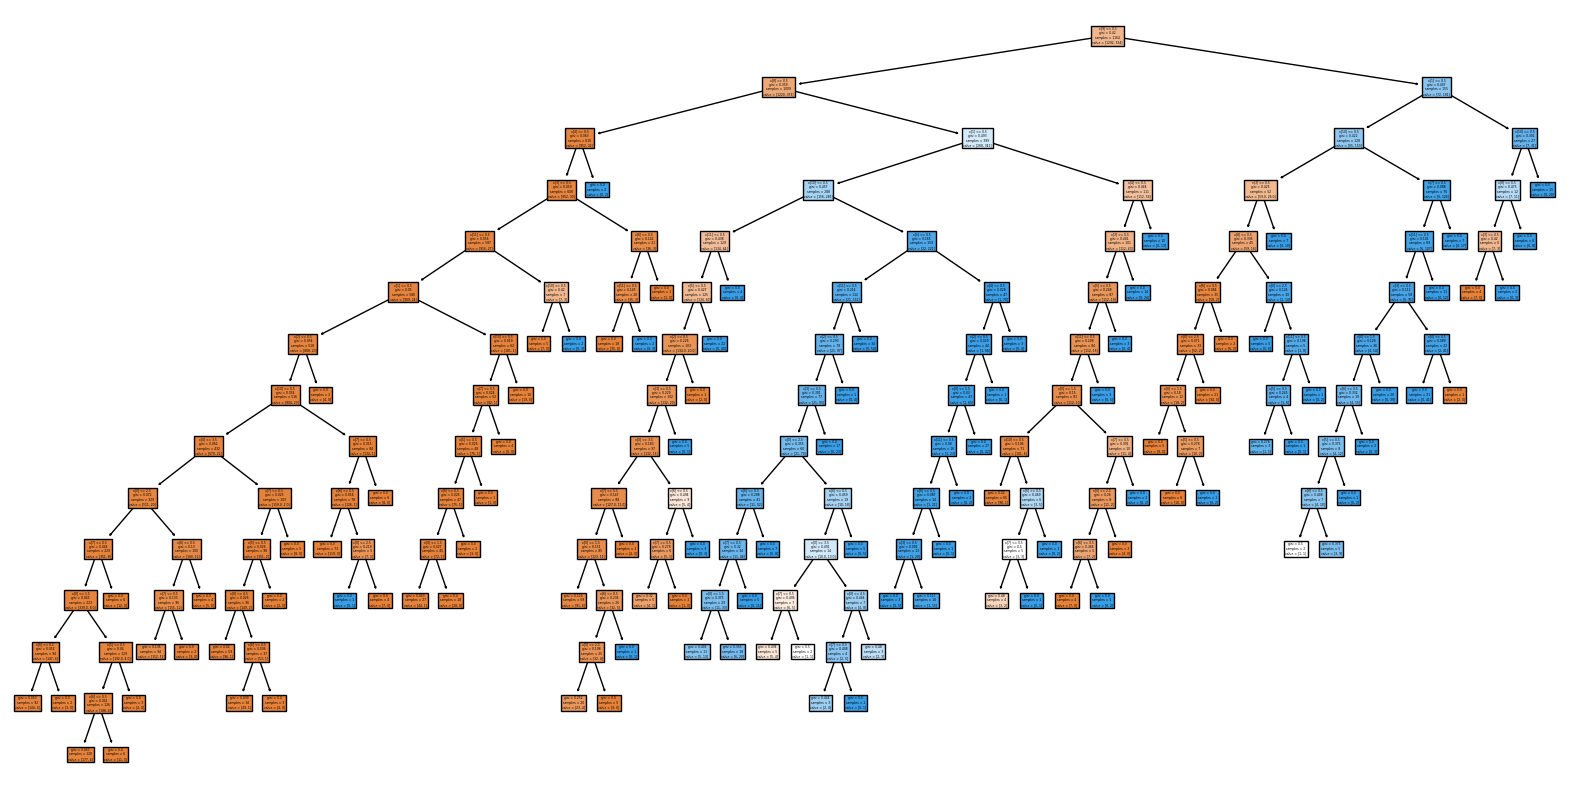

In [8]:
# Klasifikasi
print(" INPUT CONTOH ".center(75, "="))
A = int(input("Age: "))
A = int(A)
print("Jenis Kelamin 0 = Perempuan, 1 = Laki-laki")
B = int(input("Jenis Kelamin: "))
B = int(B)
print("Y = Yes. N = No")
C = input("Apakah pasien mengalami C? : ")
D = input("Apakah pasien mengalami D? : ")
E = input("Apakah pasien mengalami E? : ")
F = input("Apakah pasien mengalami F? : ")
G = input("Apakah pasien mengalami G? : ")
H = input("Apakah pasien mengalami H? : ")
I = input("Apakah pasien mengalami I? : ")
J = input("Apakah pasien mengalami J? : ")
K = input("Apakah pasien mengalami K? : ")
L = input("Apakah pasien mengalami L? : ")
M = input("Apakah M? : ")

umur_k = 0
A_k = 0
B_k = 0

if A < 21:
    A_k = 1
if A > 20 and A < 31:
    A_k = 2
if A > 30 and A < 41:
    A_k = 3
if A > 40 and A < 51:
    A_k = 4
if A > 50:
    A_k = 5
print("Kode umur pasien: ", A_k)

if B == 0:
    B_k = 0
else:
    B_k = 1

if C == "Y":
    C = 1
else:
    C = 0

if D == "Y":
    D = 1
else:
    D = 0

if E == "Y":
    E = 1
else:
    E = 0

if F == "Y":
    F = 1
else:
    F = 0

if G == "Y":
    G = 1
else:
    G = 0

if H == "Y":
    H = 1
else:
    H = 0

if I == "Y":
    I = 1
else:
    I = 0

if J == "Y":
    J = 1
else:
    J = 0

if K == "Y":
    K = 1
else:
    K = 0

if L == "Y":
    L = 1
else:
    L = 0

if M == "Y":
    M = 1
else:
    M = 0

Train = [A_k, B_k, C, D, E, F, G, H, I, J, K, L, M]
print(Train)

test = pd.DataFrame(Train).T
predtest = random_forest.predict(test)

if predtest == 1:
    print("Pasien positif")
else:
    print("Pasien negative")

# Visualisasi Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(random_forest.estimators_[0], filled=True)
plt.show()
